# Importing Libraries

In [ ]:


import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
nltk.download('stopwords')

import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

import os


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading Data

In [ ]:
data=pd.read_csv('train.csv')
data.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


Size of Data:---

In [ ]:
data.shape

(27481, 4)

Checking null values:-----

In [ ]:
data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

Removing null values from Data and getting new size of Data:-----

In [ ]:
data.dropna(axis=0,inplace=True)
data.shape

(27480, 4)

Checking whether null value is removed or not:----

In [ ]:
data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [ ]:
data['textID'].nunique()

27480

In [ ]:
data.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,755a0e11ab,ahahaha okay deal now i only have to snuff h...,good,neutral
freq,1,1,199,11117


# Analysing the given Data

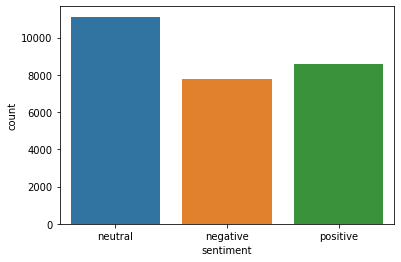

In [ ]:
sns.countplot(x='sentiment',data=data)

In [ ]:
temp = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


finding number of words in given text:----

In [ ]:
data['orig_text_length']=data['text'].str.split().str.len()

finding number of words in subtext/selected_text:----

In [ ]:
data['subtext_length']=data['selected_text'].str.split().str.len()


finding difference between number of words in text and selected_text:----

In [ ]:
data['diff_in_words']=data['orig_text_length']-data['subtext_length']

In [ ]:
data.head(10)

,textID,text,selected_text,sentiment,orig_text_length,subtext_length,diff_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,2,8
2,088c60f138,my boss is bullying me...,bullying me,negative,5,2,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,3,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,3,11
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,12,12,0
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,14,1,13
7,50e14c0bb8,Soooo high,Soooo high,neutral,2,2,0
8,e050245fbd,Both of you,Both of you,neutral,3,3,0
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,10,5,5


# Evaluating Jaccard Similarity Score

In [ ]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [ ]:
data.loc[:,'jaccard_score'] = np.vectorize(jaccard, otypes=["O"]) (data['text'], data['selected_text'])

In [ ]:
data.head(10)

,textID,text,selected_text,sentiment,orig_text_length,subtext_length,diff_in_words,jaccard_score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,2,8,0.2
2,088c60f138,my boss is bullying me...,bullying me,negative,5,2,3,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,3,2,0.6
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,3,11,0.214286
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,12,12,0,1
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,14,1,13,0.0714286
7,50e14c0bb8,Soooo high,Soooo high,neutral,2,2,0,1
8,e050245fbd,Both of you,Both of you,neutral,3,3,0,1
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,10,5,5,0.5


# Distribution of Words in Text and Subtext

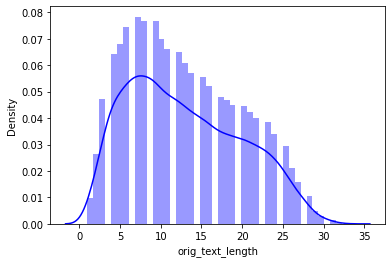

In [ ]:
sns.distplot(data['orig_text_length'],color='blue')

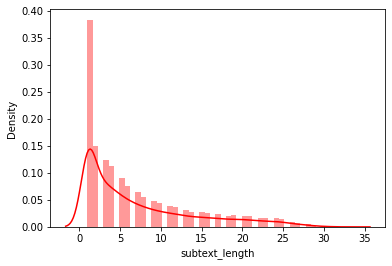

In [ ]:
sns.distplot(data['subtext_length'],color='red')

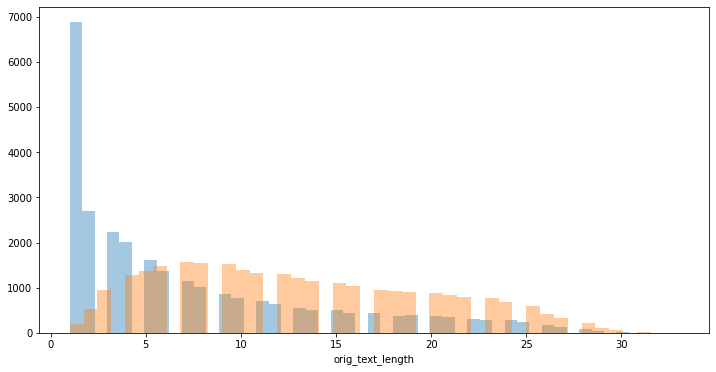

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['subtext_length'],kde=False)
sns.distplot(data['orig_text_length'],kde=False)

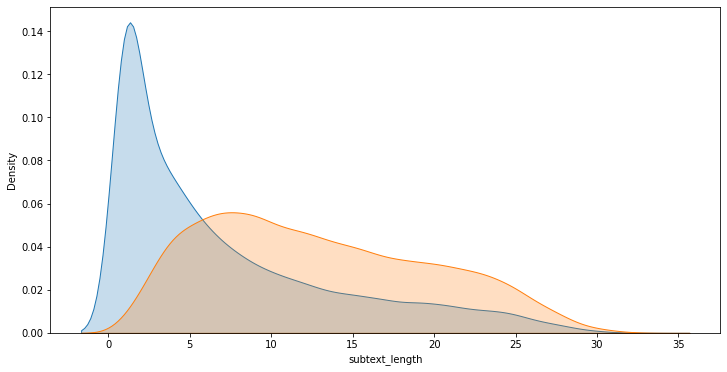

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data['subtext_length'],shade=True)
sns.kdeplot(data['orig_text_length'],shade=True)

Sentiment Wise Distribution:----

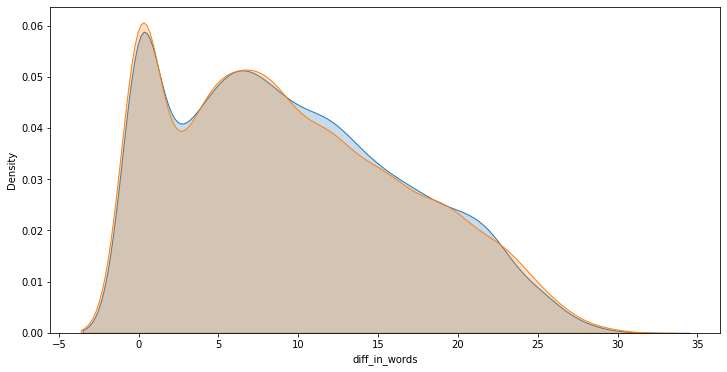

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data[data['sentiment']=='positive']['diff_in_words'],shade=True)
sns.kdeplot(data[data['sentiment']=='negative']['diff_in_words'],shade=True)

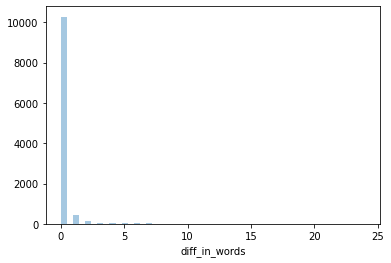

In [ ]:
sns.distplot(data[data['sentiment']=='neutral']['diff_in_words'],kde=False)

In [ ]:
data['jaccard_score']=data['jaccard_score'].astype(float)

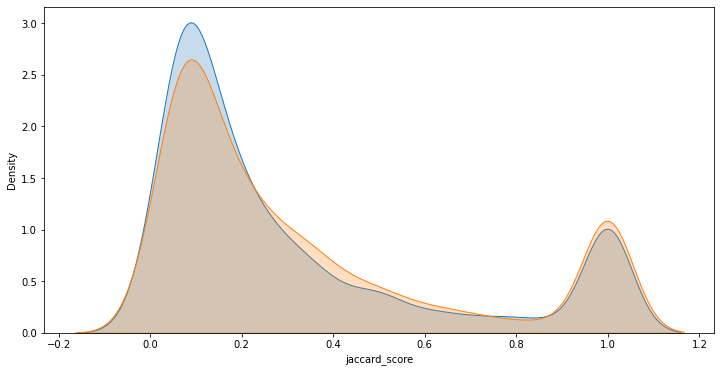

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data[data['sentiment']=='positive']['jaccard_score'],shade=True)
sns.kdeplot(data[data['sentiment']=='negative']['jaccard_score'],shade=True)


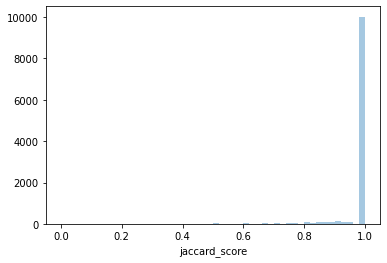

In [ ]:
sns.distplot(data[data['sentiment']=='neutral']['jaccard_score'],kde=False)

In [ ]:
data['jaccard_score'].dtype

dtype('float64')

In [ ]:
data['jaccard_score']=data['jaccard_score'].astype(float)

In [ ]:
data['jaccard_score'].dtype

dtype('float64')

In [ ]:
pred=data[data['orig_text_length']<=2]

In [ ]:
pred.groupby('sentiment').mean()

,orig_text_length,subtext_length,diff_in_words,jaccard_score
sentiment,,,,
negative,1.842593,1.509259,0.333333,0.788580
neutral,1.670702,1.653753,0.016949,0.977805
positive,1.777778,1.415459,0.362319,0.765700


In [ ]:
pred[pred['sentiment']=='positive']

,textID,text,selected_text,sentiment,orig_text_length,subtext_length,diff_in_words,jaccard_score
68,fa2654e730,Chilliin,Chilliin,positive,1,1,0,1.0
80,bbbc46889b,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,positive,2,2,0,1.0
170,f3d95b57b1,good morning,good morning,positive,2,2,0,1.0
278,89d5b3f0b5,Thanks,Thanks,positive,1,1,0,1.0
430,a78ef3e0d0,Goodmorning,Goodmorning,positive,1,1,0,1.0
...,...,...,...,...,...,...,...,...
26690,e80c242d6a,Goodnight;,Goodnight;,positive,1,1,0,1.0
26726,aad244f37d,*hug*,*hug*,positive,1,1,0,1.0
26843,a46571fe12,congrats!,congrats!,positive,1,1,0,1.0
26960,49a942e9b1,Happy birthday.,Happy birthday.,positive,2,2,0,1.0


In [ ]:
pred[pred['sentiment']=='negative']

,textID,text,selected_text,sentiment,orig_text_length,subtext_length,diff_in_words,jaccard_score
26,852edc3769,I`m sorry.,I`m sorry.,negative,2,2,0,1.0
124,f0460d611d,not well,not well,negative,2,2,0,1.0
144,7e4ed52c4a,Hate fighting,Hate fighting,negative,2,2,0,1.0
218,a8734230b6,Ew traffic,Ew traffic,negative,2,2,0,1.0
329,0404648e1c,?sucks!?..,?sucks!?..,negative,1,1,0,1.0
...,...,...,...,...,...,...,...,...
26260,cfedf94a53,"ohh, ouch",ouch,negative,2,1,1,0.5
26754,b6f6bd82c0,careless,careless,negative,1,1,0,1.0
26798,0e2f13043e,reaaaallly bored,reaaaallly bored,negative,2,2,0,1.0
26851,b732cd6641,I`m sorry,I`m sorry,negative,2,2,0,1.0


# Cleaning The Texts

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
data['text']=data['text'].apply(clean_text)

In [ ]:
data['selected_text']=data['selected_text'].apply(clean_text)

In [ ]:
data.head(10)

,textID,text,selected_text,sentiment,orig_text_length,subtext_length,diff_in_words,jaccard_score
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,7,7,0,1.000000
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,10,2,8,0.200000
2,088c60f138,my boss is bullying me,bullying me,negative,5,2,3,0.166667
3,9642c003ef,what interview leave me alone,leave me alone,negative,5,3,2,0.600000
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,14,3,11,0.214286
5,28b57f3990,some shameless plugging for the best rangers...,some shameless plugging for the best rangers...,neutral,12,12,0,1.000000
6,6e0c6d75b1,feedings for the baby are fun when he is all ...,fun,positive,14,1,13,0.071429
7,50e14c0bb8,soooo high,soooo high,neutral,2,2,0,1.000000
8,e050245fbd,both of you,both of you,neutral,3,3,0,1.000000
9,fc2cbefa9d,journey wow u just became cooler hehe is tha...,wow u just became cooler,positive,10,5,5,0.500000


# Finding Most Common Words

In [ ]:
data['common_list']=data['selected_text'].apply(lambda x:str(x).split())

In [ ]:
dict={}
for i in data['common_list']:
    for item in i:
        dict[item]=dict.get(item,0)+1;

In [ ]:
dict

{'id': 90,
 'have': 1345,
 'responded': 1,
 'if': 420,
 'i': 7200,
 'were': 242,
 'going': 592,
 'sooo': 61,
 'sad': 424,
 'bullying': 1,
 'me': 1540,
 'leave': 82,
 'alone': 42,
 'sons': 6,
 'of': 1638,
 'some': 418,
 'shameless': 1,
 'plugging': 2,
 'for': 1854,
 'the': 4590,
 'best': 223,
 'rangers': 2,
 'forum': 2,
 'on': 1488,
 'earth': 8,
 'fun': 445,
 'soooo': 52,
 'high': 41,
 'both': 67,
 'you': 2624,
 'wow': 123,
 'u': 519,
 'just': 1153,
 'became': 5,
 'cooler': 4,
 'as': 382,
 'much': 372,
 'love': 909,
 'to': 5305,
 'be': 1095,
 'hopeful': 6,
 'reckon': 4,
 'chances': 5,
 'are': 727,
 'minimal': 2,
 'p': 34,
 'im': 1676,
 'never': 184,
 'gonna': 211,
 'get': 772,
 'my': 2783,
 'cake': 30,
 'and': 2321,
 'stuff': 80,
 'like': 774,
 'dangerously': 1,
 'lost': 107,
 'test': 46,
 'from': 487,
 'lg': 2,
 'uh': 12,
 'oh': 328,
 'am': 439,
 'sunburned': 6,
 'sigh': 25,
 'sick': 214,
 'onna': 1,
 'hes': 104,
 'not': 1199,
 'that': 1297,
 'into': 107,
 'marly': 1,
 'so': 1410,
 'so

In [ ]:
 temp=sorted(dict.items(), key=lambda x: x[1],reverse=True)

In [ ]:
temp

[('i', 7200),
 ('to', 5305),
 ('the', 4590),
 ('a', 3538),
 ('my', 2783),
 ('you', 2624),
 ('and', 2321),
 ('it', 2158),
 ('is', 2115),
 ('in', 1986),
 ('for', 1854),
 ('im', 1676),
 ('of', 1638),
 ('me', 1540),
 ('on', 1488),
 ('so', 1410),
 ('have', 1345),
 ('that', 1297),
 ('but', 1267),
 ('good', 1251),
 ('not', 1199),
 ('just', 1153),
 ('be', 1095),
 ('its', 1070),
 ('day', 1058),
 ('with', 1053),
 ('at', 1000),
 ('was', 949),
 ('love', 909),
 ('happy', 852),
 ('no', 823),
 ('this', 808),
 ('all', 800),
 ('up', 790),
 ('out', 786),
 ('like', 774),
 ('get', 772),
 ('now', 770),
 ('dont', 765),
 ('are', 727),
 ('go', 700),
 ('do', 638),
 ('cant', 613),
 ('work', 612),
 ('too', 603),
 ('going', 592),
 ('your', 582),
 ('today', 564),
 ('got', 558),
 ('one', 538),
 ('time', 534),
 ('thanks', 532),
 ('lol', 528),
 ('really', 520),
 ('u', 519),
 ('miss', 519),
 ('what', 507),
 ('will', 491),
 ('know', 491),
 ('from', 487),
 ('back', 483),
 ('great', 476),
 ('we', 448),
 ('can', 446),
 ('

In [ ]:
temp[:20]

[('i', 7200),
 ('to', 5305),
 ('the', 4590),
 ('a', 3538),
 ('my', 2783),
 ('you', 2624),
 ('and', 2321),
 ('it', 2158),
 ('is', 2115),
 ('in', 1986),
 ('for', 1854),
 ('im', 1676),
 ('of', 1638),
 ('me', 1540),
 ('on', 1488),
 ('so', 1410),
 ('have', 1345),
 ('that', 1297),
 ('but', 1267),
 ('good', 1251)]

In [ ]:
top = pd.DataFrame(columns=['common_words','count'],data=temp[:20])
top.style.background_gradient(cmap='Blues')
top

,common_words,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


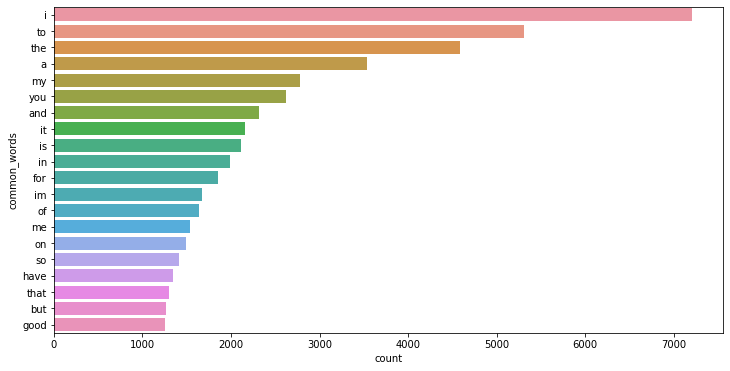

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=top['common_words'],x=top['count'])

In [ ]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
data['common_list'] = data['common_list'].apply(lambda x:remove_stopword(x))

In [ ]:
dict={}
for i in data['common_list']:
    for item in i:
        dict[item]=dict.get(item,0)+1;
temp=sorted(dict.items(), key=lambda x: x[1],reverse=True)
top = pd.DataFrame(columns=['common_words','count'],data=temp[1:20])
top

,common_words,count
0,good,1251
1,day,1058
2,love,909
3,happy,852
4,like,774
5,get,772
6,dont,765
7,go,700
8,cant,613
9,work,612


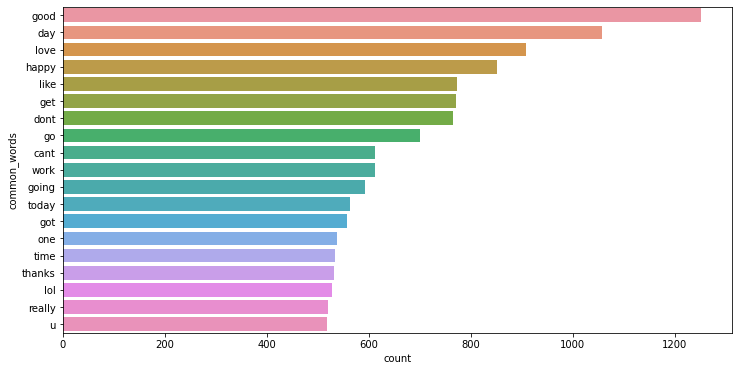

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=top['common_words'],x=top['count'])

In [ ]:
data['common_text']=data['text'].apply(lambda x:str(x).split())
data['common_text']=data['common_text'].apply(lambda x:remove_stopword(x))

In [ ]:
comm_word={}

In [ ]:
for i in data['common_text']:
    for item in i:
        comm_word[item]=comm_word.get(item,0)+1
temp1=sorted(comm_word.items(),key=lambda x:x[1],reverse=True)
top1=pd.DataFrame(columns=['common_words','count'],data=temp1[1:25])
top1

,common_words,count
0,day,2044
1,good,1549
2,get,1426
3,like,1346
4,go,1267
5,dont,1200
6,love,1122
7,work,1112
8,going,1096
9,today,1096


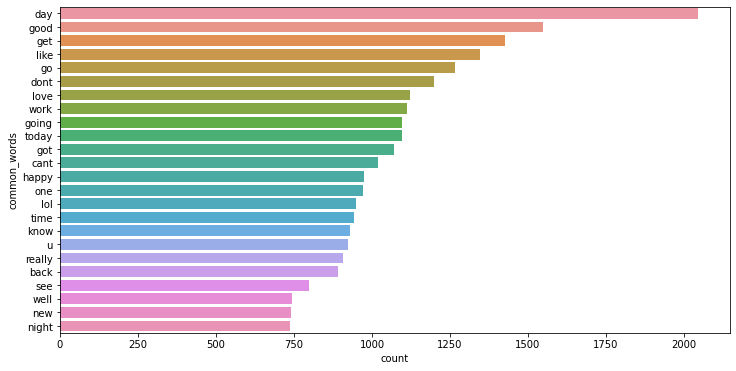

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=top1['common_words'],x=top1['count'])

In [ ]:
positive=data[data['sentiment']=='positive']
neutral=data[data['sentiment']=='neutral']
negative=data[data['sentiment']=='negative']

In [ ]:
comm_word={}
for i in positive['common_list']:
    for item in i:
        comm_word[item]=comm_word.get(item,0)+1
temp2=sorted(comm_word.items(),key=lambda x:x[1],reverse=True)
top_pos=pd.DataFrame(columns=['common_words','count'],data=temp2[0:20])
top_pos

,common_words,count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


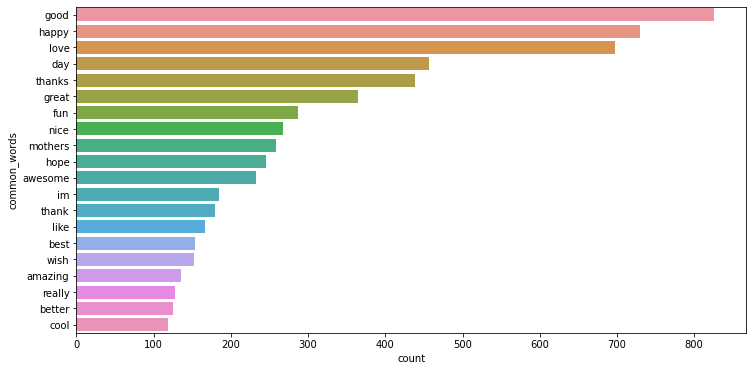

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=top_pos['common_words'],x=top_pos['count'])

In [ ]:
comm_word={}
for i in neutral['common_list']:
    for item in i:
        comm_word[item]=comm_word.get(item,0)+1
temp=sorted(comm_word.items(),key=lambda x:x[1],reverse=True)
top_neu=pd.DataFrame(columns=['common_words','count'],data=temp[1:20])
top_neu

,common_words,count
0,get,612
1,go,569
2,day,492
3,dont,482
4,going,472
5,work,467
6,like,445
7,got,441
8,today,427
9,lol,427


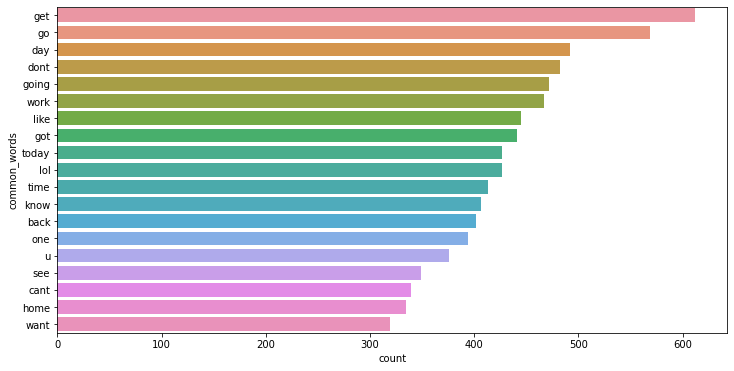

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=top_neu['common_words'],x=top_neu['count'])

In [ ]:
comm_word={}
for i in negative['common_list']:
    for item in i:
        comm_word[item]=comm_word.get(item,0)+1
temp=sorted(comm_word.items(),key=lambda x:x[1],reverse=True)
top_neg=pd.DataFrame(columns=['common_words','count'],data=temp[1:20])
top_neg.style.background_gradient(cmap='Reds')
top_neg

,common_words,count
0,miss,358
1,sad,343
2,sorry,300
3,bad,246
4,hate,230
5,dont,221
6,cant,201
7,sick,166
8,like,162
9,sucks,159


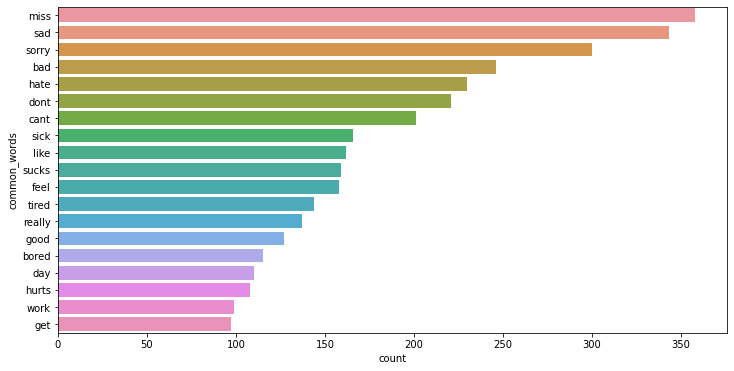

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=top_neg['common_words'],x=top_neg['count'])

In [ ]:
data[data['sentiment']=='positive']['common_list']

6                                               [fun]
9                            [wow, u, became, cooler]
11                                             [like]
21                                      [interesting]
25       [free, fillin, app, ipod, fun, im, addicted]
                             ...                     
27467                                       [welcome]
27474                                [feel, good, ab]
27475                                         [enjoy]
27478                                     [yay, good]
27479                                         [worth]
Name: common_list, Length: 8582, dtype: object

In [ ]:
raw_text = [word for word_list in data['common_text'] for word in word_list]

In [ ]:
def words_unique(sentiment,numwords,raw_words):
    
    allother = []
    for item in data[data.sentiment != sentiment]['common_text']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in data[data.sentiment == sentiment]['common_text']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [ ]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,congratulations,29
1,thnx,10
2,appreciated,8
3,shared,7
4,presents,7
5,greetings,7
6,blessings,6
7,mothersday,6
8,mcr,6
9,coolest,6


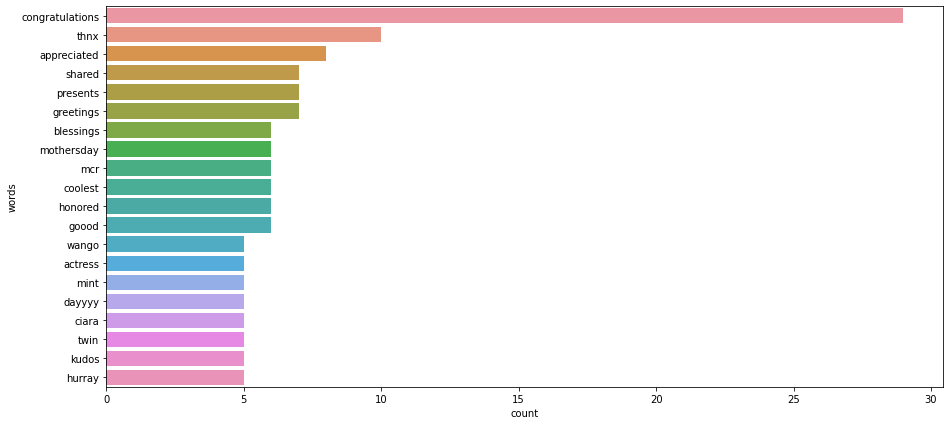

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y=Unique_Positive['words'],x=Unique_Positive['count'])

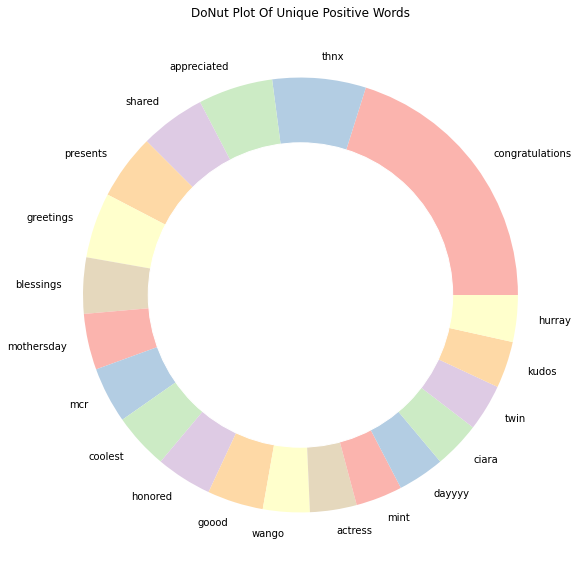

In [ ]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [ ]:
Unique_Negative= words_unique('negative', 20, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 20 unique words in Negative Tweets are:


,words,count
0,ache,12
1,suffering,9
2,allergic,7
3,cramps,7
4,saddest,7
5,pissing,7
6,sob,6
7,dealing,6
8,devastated,6
9,noes,6


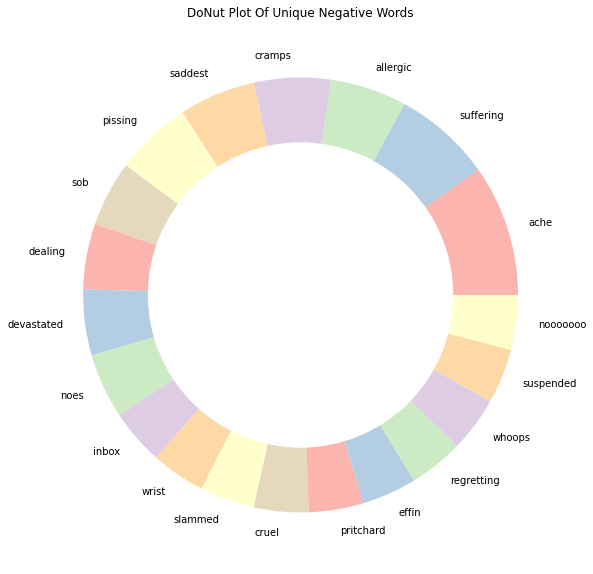

In [ ]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

In [ ]:
Unique_Neutral= words_unique('neutral', 20, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,settings,9
1,explain,7
2,mite,6
3,hiya,6
4,reader,5
5,pr,5
6,sorta,5
7,fathers,5
8,enterprise,5
9,guessed,5


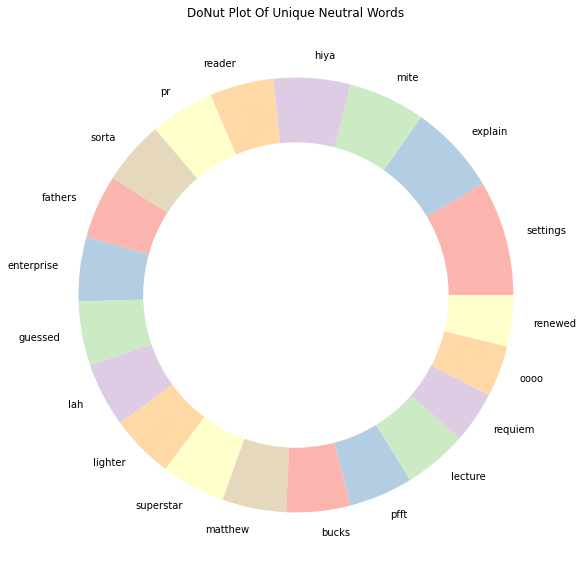

In [ ]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')

In [ ]:
df_train['Num_words_text'] = df_train['text'].apply(lambda x:len(str(x).split()))

In [ ]:
df_train = df_train[df_train['Num_words_text']>=3]

In [ ]:
def save_model(output_dir, nlp, new_model_name):
    ''' This Function Saves model to 
    given output directory'''
    
    output_dir = f'../working/{output_dir}'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [ ]:
def train(train_data, output_dir, n_iter=20, model=None):
  
    if model is not None:
        nlp = spacy.load(output_dir)  
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  
        print("Created blank 'en' model")
    
    
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
  
    else:
        ner = nlp.get_pipe("ner")
    
    
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

   
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  
        
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()


        for itn in tqdm(range(n_iter)):
            random.shuffle(train_data)
            batches = minibatch(train_data, size=compounding(4.0, 500.0, 1.001))    
            losses = {}
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts,  
                            annotations,  
                            drop=0.5,   
                            losses=losses, 
                            )
            print("Losses", losses)
    save_model(output_dir, nlp, 'st_ner')

In [ ]:
def get_model_out_path(sentiment):
    '''
    Returns Model output path
    '''
    model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    return model_out_path

In [ ]:
def get_training_data(sentiment):
   
    train_data = []
    for index, row in df_train.iterrows():
        if row.sentiment == sentiment:
            selected_text = row.selected_text
            text = row.text
            start = text.find(selected_text)
            end = start + len(selected_text)
            train_data.append((text, {"entities": [[start, end, 'selected_text']]}))
    return train_data

In [ ]:
sentiment = 'positive'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(train_data, model_path, n_iter=3, model=None)

  0%|          | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|███▎      | 1/3 [00:48<01:36, 48.40s/it]

Losses {'ner': 32710.549421212156}


 67%|██████▋   | 2/3 [01:36<00:48, 48.25s/it]

Losses {'ner': 30465.99880069069}


100%|██████████| 3/3 [02:24<00:00, 48.06s/it]

Losses {'ner': 29795.50301810135}
Saved model to ../working/models/model_pos


In [ ]:
sentiment = 'negative'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(train_data, model_path, n_iter=3, model=None)

  0%|          | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|███▎      | 1/3 [00:45<01:31, 45.78s/it]

Losses {'ner': 31823.58406909113}


 67%|██████▋   | 2/3 [01:31<00:45, 45.72s/it]

Losses {'ner': 28000.821318317114}


100%|██████████| 3/3 [02:16<00:00, 45.47s/it]

Losses {'ner': 27278.37300633752}
Saved model to ../working/models/model_neg


In [ ]:
def predict_entities(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    return selected_text

In [ ]:
selected_texts = []
MODELS_BASE_PATH = '../working/models/'

if MODELS_BASE_PATH is not None:
    print("Loading Models  from ", MODELS_BASE_PATH)
    model_pos = spacy.load(MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(MODELS_BASE_PATH + 'model_neg')
        
    for index, row in df_test.iterrows():
        text = row.text
        output_str = ""
        if row.sentiment == 'neutral' or len(text.split()) <= 2:
            selected_texts.append(text)
        elif row.sentiment == 'positive':
            selected_texts.append(predict_entities(text, model_pos))
        else:
            selected_texts.append(predict_entities(text, model_neg))
        
df_test['selected_text'] = selected_texts

Loading Models  from  ../working/models/


In [ ]:
df_submission['selected_text'] = df_test['selected_text']
df_submission.to_csv("submission.csv", index=False)
display(df_submission.head(10))

,textID,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,exciting
2,eee518ae67,shame!
3,01082688c6,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!
5,726e501993,that`s great!! weee!! visitors!
6,261932614e,HATES
7,afa11da83f,blocked
8,e64208b4ef,and within a short time of the last clue all ...
9,37bcad24ca,What did you get? My day is alright.. haven`...
